In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
data= pd.read_csv(r"D:\career\datasets\insurance.csv")

In [6]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.shape

(1338, 7)

In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\suhai\AppData\Local\Temp\ipykernel_1932\2127411137.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


<Axes: xlabel='age', ylabel='Density'>

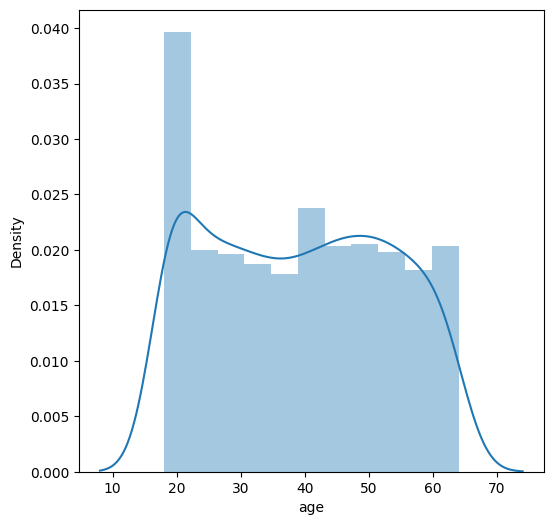

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(data['age'])

<Axes: xlabel='sex', ylabel='count'>

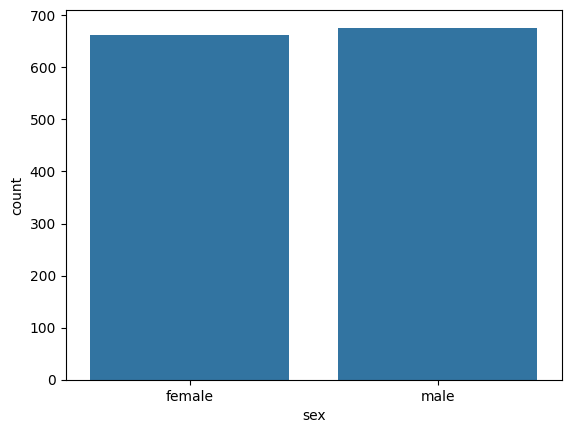

In [15]:
sns.countplot(data =data, x='sex')

In [20]:
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\suhai\AppData\Local\Temp\ipykernel_1932\715337557.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

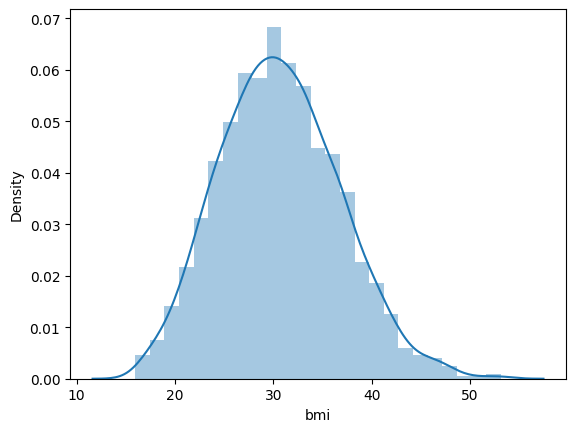

In [21]:
sns.distplot(data['bmi'])

In [22]:
data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

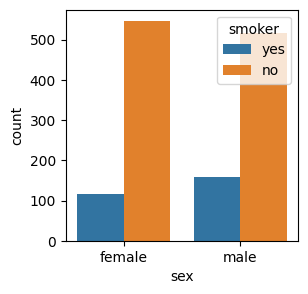

In [25]:
plt.figure(figsize=(3,3))
sns.countplot(x='sex',data=data,hue = 'smoker')

data preprocess

In [27]:
data.replace({'sex' : {'male': 0,'female':1}}, inplace =True)

C:\Users\suhai\AppData\Local\Temp\ipykernel_1932\2886910883.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'sex' : {'male': 0,'female':1}}, inplace =True)


In [31]:
data.replace({'smoker':{'yes': 0,'no':1}},inplace = True)

C:\Users\suhai\AppData\Local\Temp\ipykernel_1932\33322475.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'smoker':{'yes': 0,'no':1}},inplace = True)


In [33]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [40]:
data['region'].value_counts()


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [42]:
data.replace ({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace = True)

C:\Users\suhai\AppData\Local\Temp\ipykernel_1932\3313654777.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace ({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace = True)


In [43]:
x = data.drop(columns='charges',axis =1 )
y= data['charges']

In [44]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,2
4,32,0,28.880,0,1,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2
1334,18,1,31.920,0,1,3
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [45]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

splitting the data into training and testing 

In [46]:
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=2)

In [48]:
x.shape, x_train.shape, x_test .shape, y_train.shape, y_test.shape

((1338, 6), (1070, 6), (268, 6), (1070,), (268,))

loding the linear regression model 

In [49]:
reg = LinearRegression( )

In [50]:
reg.fit(x_train,y_train)

LinearRegression()

model evaluation 

In [51]:
#prediction on training data
training_pre = reg.predict(x_train)

in the below code snipppet we are comparing the original values of y_train and the [predicted value of x_train which is done in the above code snippet  

In [58]:
r2_train= metrics.r2_score(y_train, training_pre)
print('r2_train:',r2_train)

r2_train: 0.7518195459072954


as r2_score is closer to 1 that means our prediction is going good 

evaluation in testing data
now we need to find the r2_score for test data

In [61]:
#prediction for x_test 
test_pre = reg.predict(x_test)

In [63]:
r2_test= metrics.r2_score(y_test, test_pre)
print('r2_score for test:' , r2_test)


r2_score for test: 0.7454471618659975


build a predicting system 


In [65]:
input_data = (52,1,30.78,1,1,3)

In [66]:
the above variable is of tye tuple which needed to be changed into numpy array

SyntaxError: invalid syntax (4071163572.py, line 1)

In [68]:
inputdata_numpy = np.asarray(input_data)
inputdata_numpy

array([52.  ,  1.  , 30.78,  1.  ,  1.  ,  3.  ])

In [70]:
inputdata_numpy_reshape = inputdata_numpy.reshape(1,-1)
inputdata_numpy_reshape

array([[52.  ,  1.  , 30.78,  1.  ,  1.  ,  3.  ]])

In [72]:
prediction= reg.predict(inputdata_numpy_reshape)
prediction

C:\Users\suhai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12041.59498574])